In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [3]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [42]:
def range_query(data, point, epsilon):
    distances = np.linalg.norm(data - point, axis=1)
    return np.where(distances <= epsilon)[0]

def dbscan(data, epsilon, min_pts):
    labels = np.full(len(data), -1) 
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != -1:
            continue
                 
        neighbors = range_query(data, data[i], epsilon)

        if len(neighbors) < min_pts:
            labels[i] = 0  #Noise Point
        else:
            cluster_id += 1
            labels[i] = cluster_id
            
            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                if labels[neighbor] == 0 or labels[neighbor] == -1:  # Border or Unvisited point
                    labels[neighbor] = cluster_id
                    new_neighbors = range_query(data, data[neighbor], epsilon)
                    if len(new_neighbors) >= min_pts:
                        neighbors = np.append(neighbors, new_neighbors)
                j += 1

    return labels


In [58]:
def plot_clusters(data, labels):

    plt.scatter(data[:, 0], data[:, 1],s= 100, c=labels, cmap='rainbow')

    plt.title('DBSCAN Clustering Result')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

def grid_search(data, epsilon_range, min_pts_range):
    best_eps = 0
    best_min_pts = 0
    best_num_clusters = 0

    for epsilon in epsilon_range:
        for min_pts in min_pts_range:
            labels= dbscan(data, epsilon, min_pts)
            unique_labels = len(np.unique(labels)) -1 
            if unique_labels > best_num_clusters:
                best_eps = epsilon
                best_min_pts = min_pts
                best_num_clusters = unique_labels

    return best_eps, best_min_pts

Best Epsilon: 0.21040100250626564
Best MinPts: 3
Label Count: 15


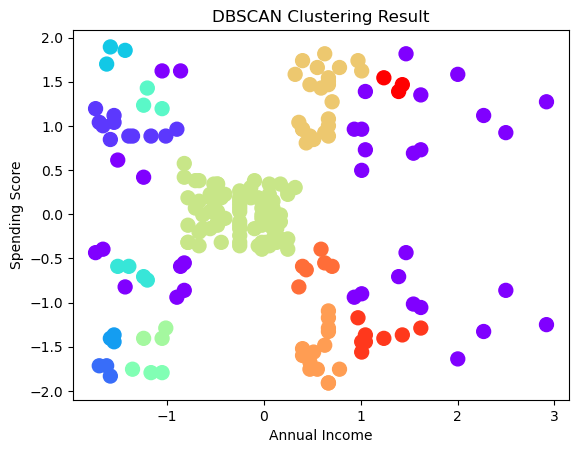

In [60]:
linspace_values = np.linspace(0.01, 1, 40)

arange_values = np.arange(2, 20, step=1)


best_epsilon, best_min_pts= grid_search(X, epsilon_range, arange_values)

print(f"Best Epsilon: {best_epsilon}")
print(f"Best MinPts: {best_min_pts}")

best_labels = dbscan(X, best_epsilon, best_min_pts)

unique_labels = np.unique(best_labels)
label_count = len(unique_labels)
print(f"Label Count: {label_count}")

plot_clusters(X, best_labels)
print("Cluster Labels:", unique_labels)
print("Number of Clusters:", label_count)

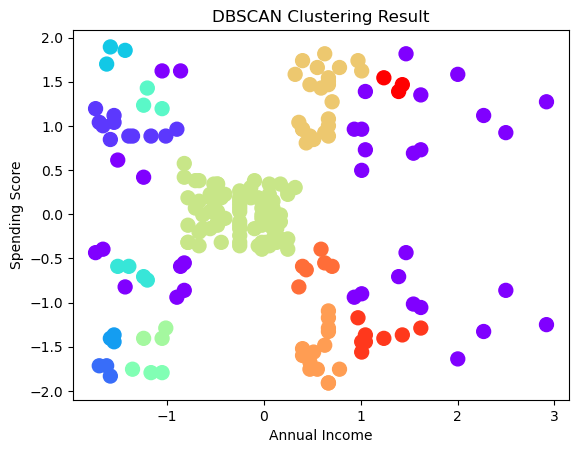

In [62]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=best_epsilon, min_samples=best_min_pts)
labels_sklearn = dbs.fit_predict(X)
plot_clusters(X, labels_sklearn)

In [63]:
best_labels

array([ 0,  1,  2,  1,  0,  1,  2,  4,  2,  1,  3,  4,  3,  1,  3,  1,  5,
        0,  0,  4,  5,  1,  7,  1,  8,  6,  5,  0,  5,  6,  7,  1,  7,  0,
        8,  6,  8,  1,  0,  1,  0,  0,  0,  9,  0,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 12, 10, 12, 10, 11, 10, 11, 10, 12, 10, 11, 10,
       11, 10, 11, 10, 11, 10, 12, 10, 11, 10, 12, 10, 11, 10, 11, 10, 11,
       10, 11, 10, 11, 10, 11, 10, 12, 10, 11, 10,  0,  0, 13, 10,  0,  0,
       13,  0, 13, 10, 13,  0, 13,  0, 13, 14,  0, 14, 13, 14,  0,  0,  0,
        0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [65]:
cluster_labels = dbs.labels_
num_clusters = len(set(cluster_labels)) 
unique_labels2 = np.unique(cluster_labels)

print("Cluster Labels:", cluster_labels)
print("Number of Clusters:", num_clusters)
print("Unique Labels: ",unique_labels2)

Cluster Labels: [-1  0  1  0 -1  0  1  3  1  0  2  3  2  0  2  0  4 -1 -1  3  4  0  6  0
  7  5  4 -1  4  5  6  0  6 -1  7  5  7  0 -1  0 -1 -1 -1  8 -1  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  9 11  9 11  9 10  9 10  9 11  9 10  9 10  9 10  9 10  9 11  9
 10  9 11  9 10  9 10  9 10  9 10  9 10  9 10  9 11  9 10  9 -1 -1 12  9
 -1 -1 12 -1 12  9 12 -1 12 -1 12 13 -1 13 12 13 -1 -1 -1 -1 12 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Number of Clusters: 15
Unique Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


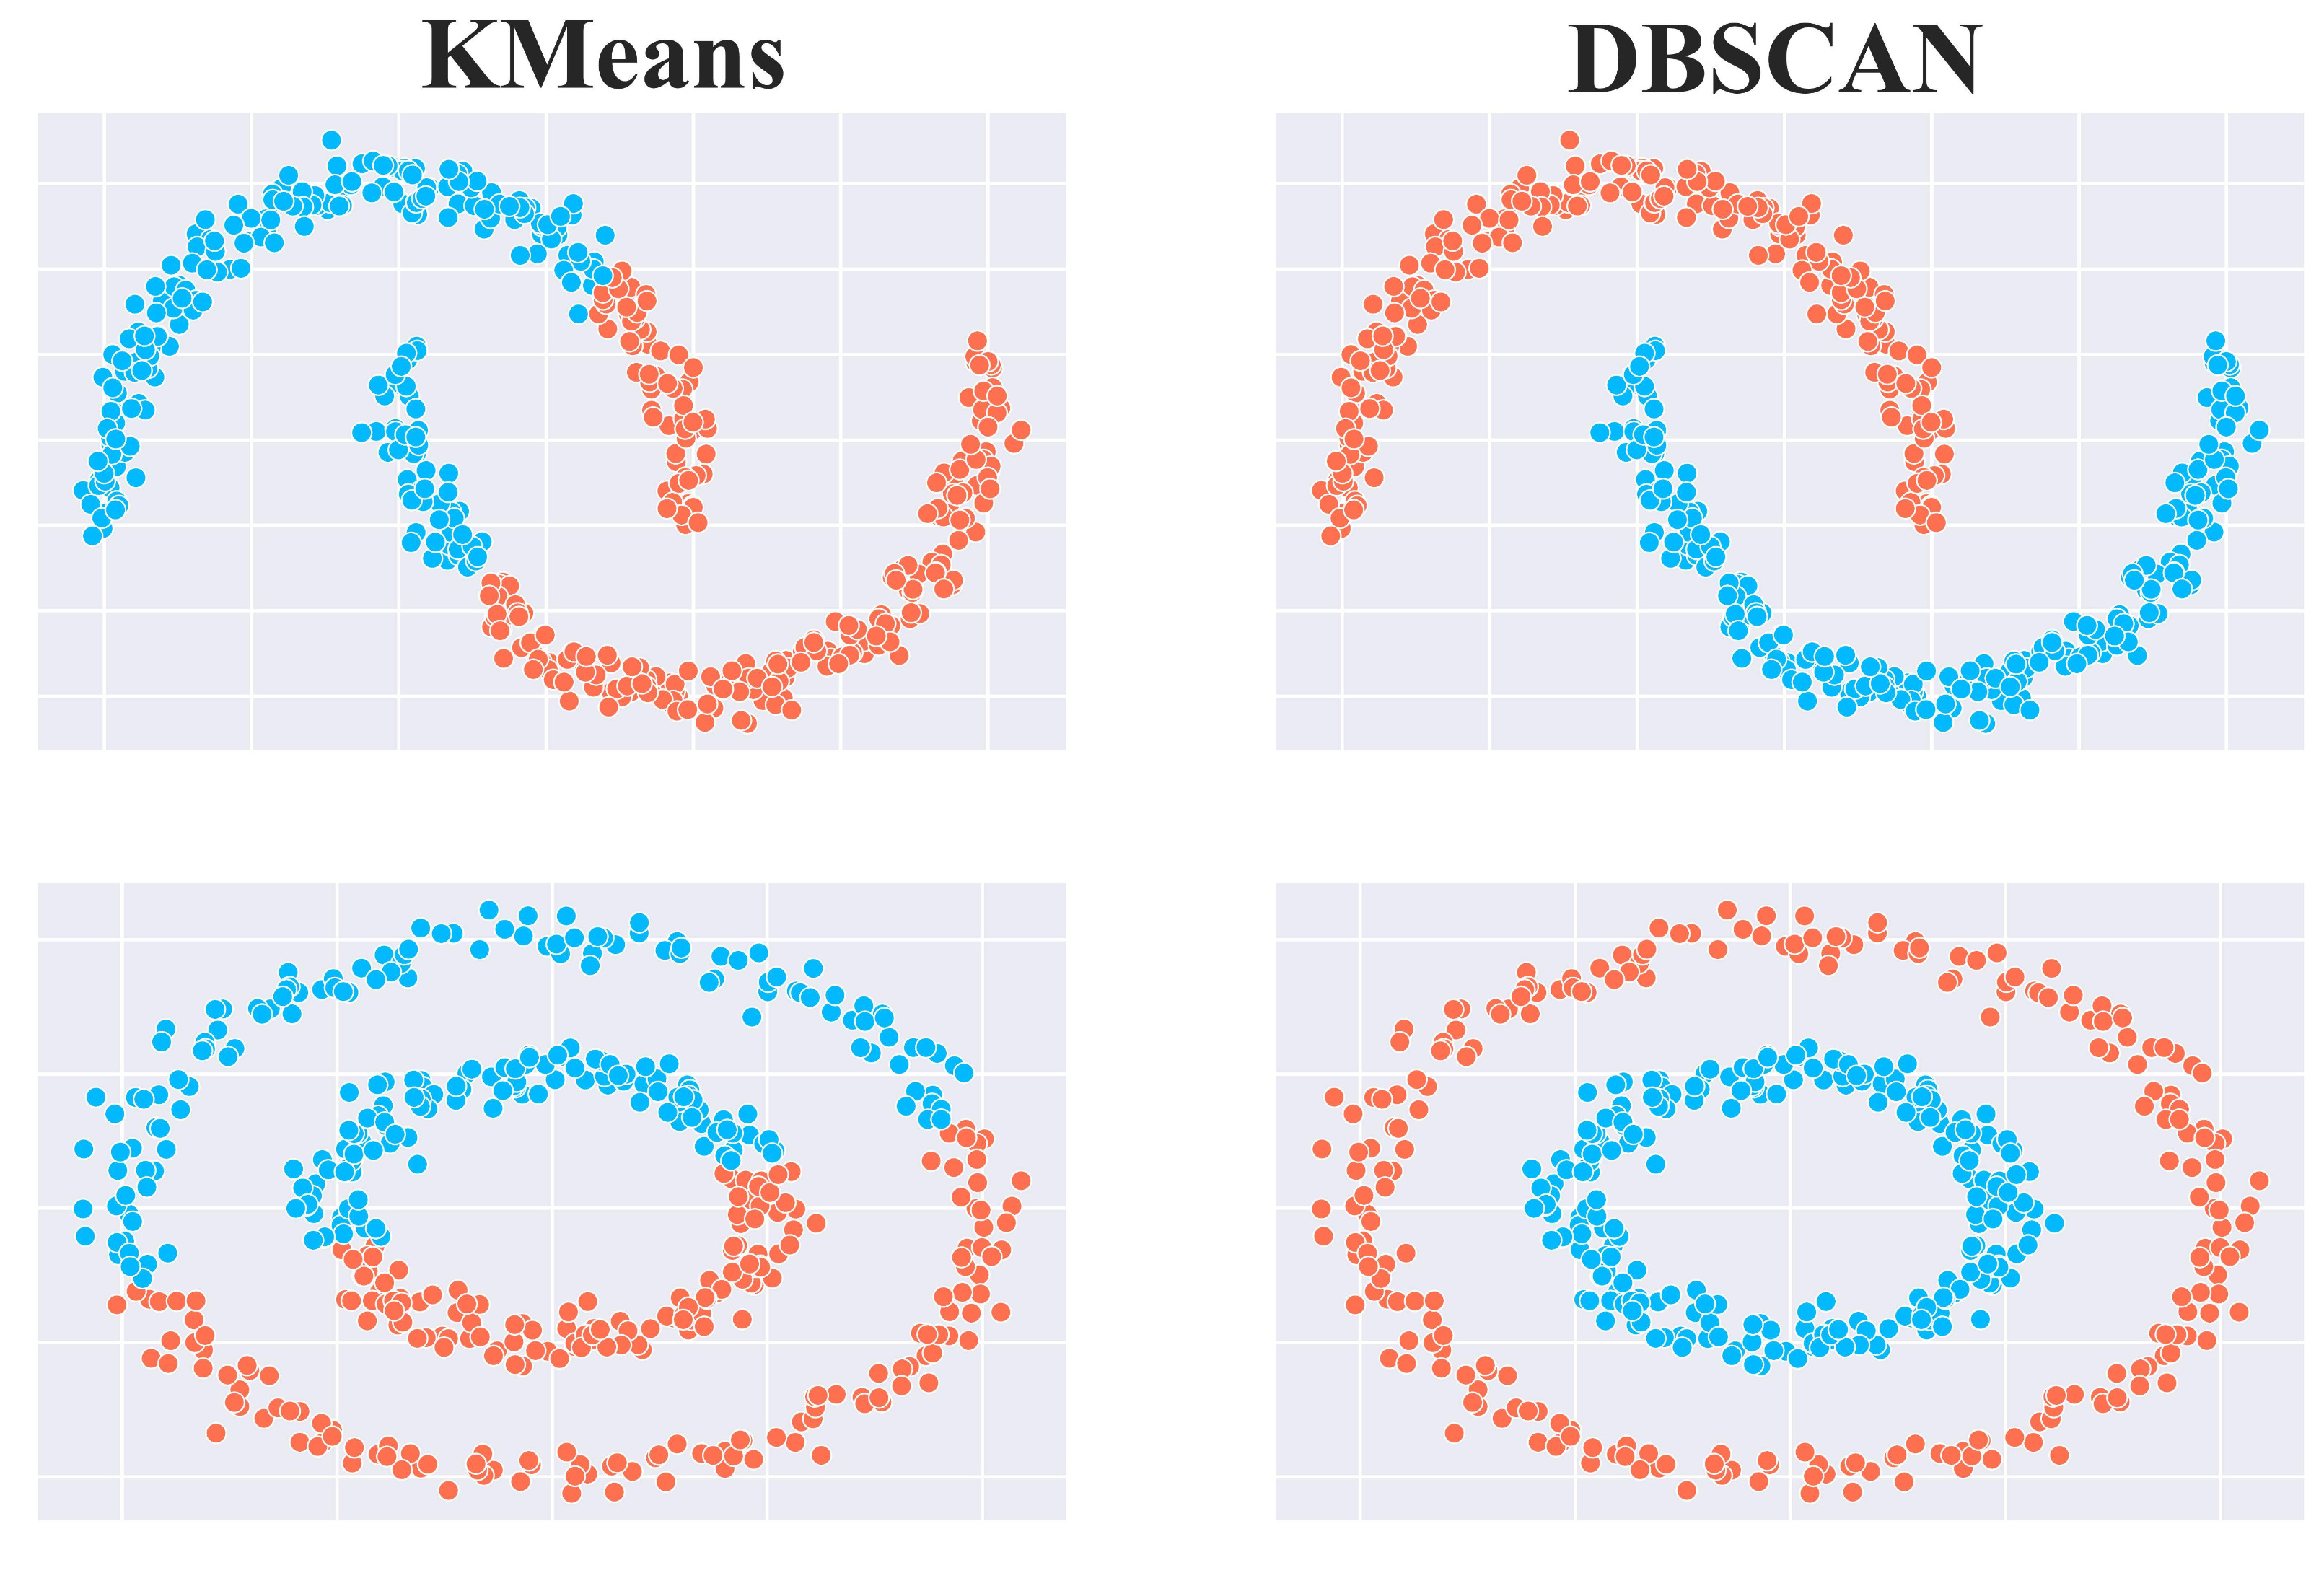

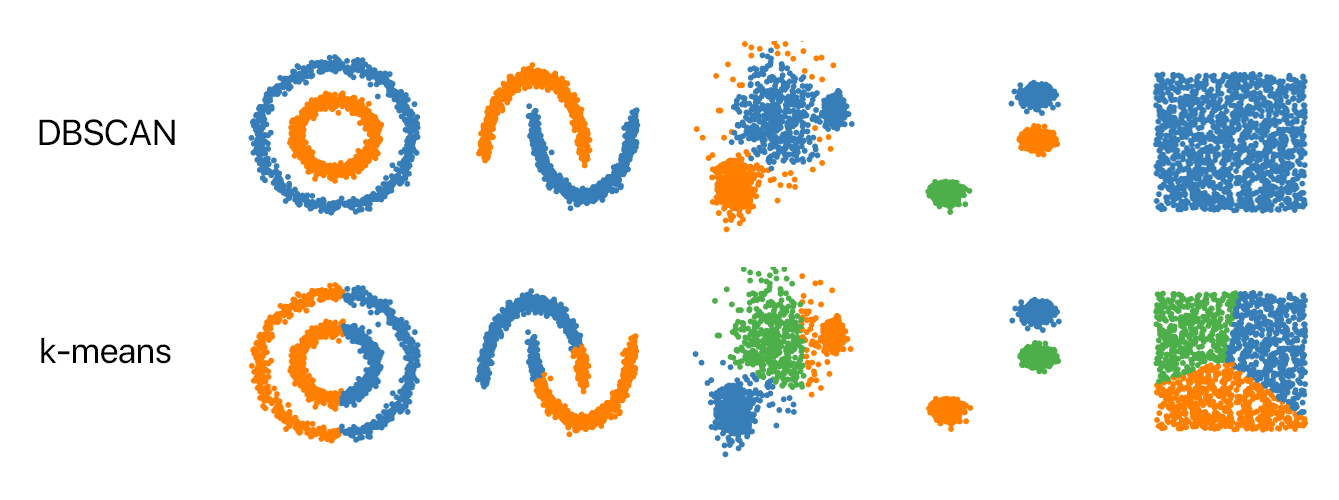